In [110]:
import pandas as pd

In [111]:
import numpy as np

In [112]:
import matplotlib.pyplot as plt

In [113]:
df=pd.read_csv("/content/Social_Network_Ads (2).csv")

In [114]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [115]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [116]:
df.shape

(400, 5)

In [117]:
x=df.iloc[:,2:3]
y=df.iloc[:,3]

In [118]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [120]:
print(xtrain[:3])
print('_'*15)
print(xtest[:3])

[[ 1.92295008]
 [ 2.02016082]
 [-1.3822153 ]]
_______________
[[-0.79895082]
 [-0.02126485]
 [-0.31289709]]


In [121]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [122]:
classifier=LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [123]:
y_pred=classifier.predict(xtest)

In [124]:
print(xtest[:10])
print('_'*15)
print(y_pred[:10])

[[-0.79895082]
 [-0.02126485]
 [-0.31289709]
 [-0.79895082]
 [-0.31289709]
 [-1.09058306]
 [-0.70174008]
 [-0.21568634]
 [-1.96547978]
 [ 0.85363187]]
_______________
[72000 72000 72000 72000 72000 72000 72000 72000 55000 72000]


In [125]:
print(y_pred[:20])
print(ytest[:20])

[ 72000  72000  72000  72000  72000  72000  72000  72000  55000  72000
  72000  72000  72000  72000  55000  72000  72000  55000 104000  72000]
132     87000
309     50000
341     75000
196     79000
246     50000
60      20000
155     15000
261    144000
141     68000
214     43000
37      49000
134     55000
113     55000
348     77000
12      86000
59     117000
293     77000
140     85000
206    130000
199     22000
Name: EstimatedSalary, dtype: int64


In [126]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [128]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


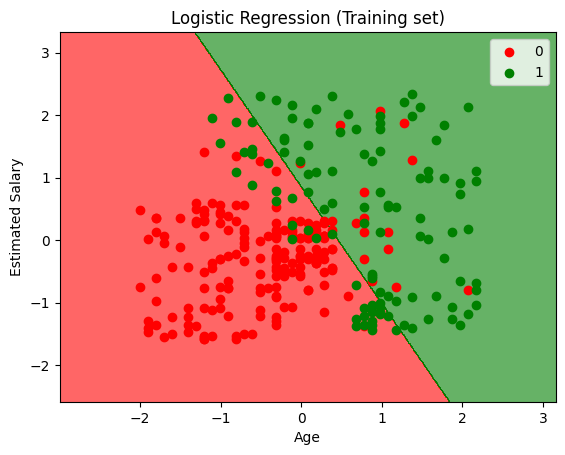

In [129]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

xset, yset = xtrain, ytrain
x1, x2 = np.meshgrid(
    np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
    np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01)
)
predicted_classes = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, predicted_classes, alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


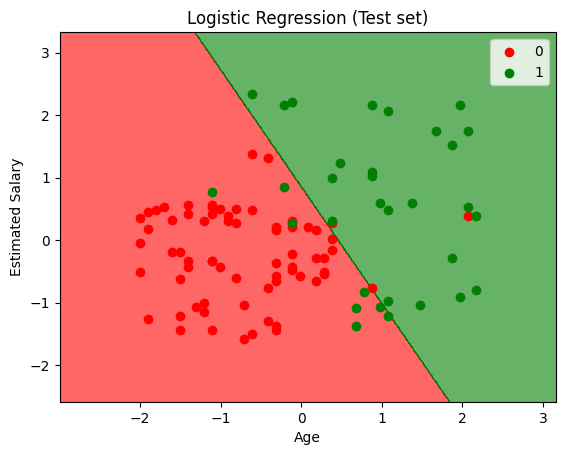

In [130]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
xset, yset = xtest, ytest
x1, x2 = np.meshgrid(np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
                     np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01))
predicted_classes = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1, x2, predicted_classes, alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1], color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()